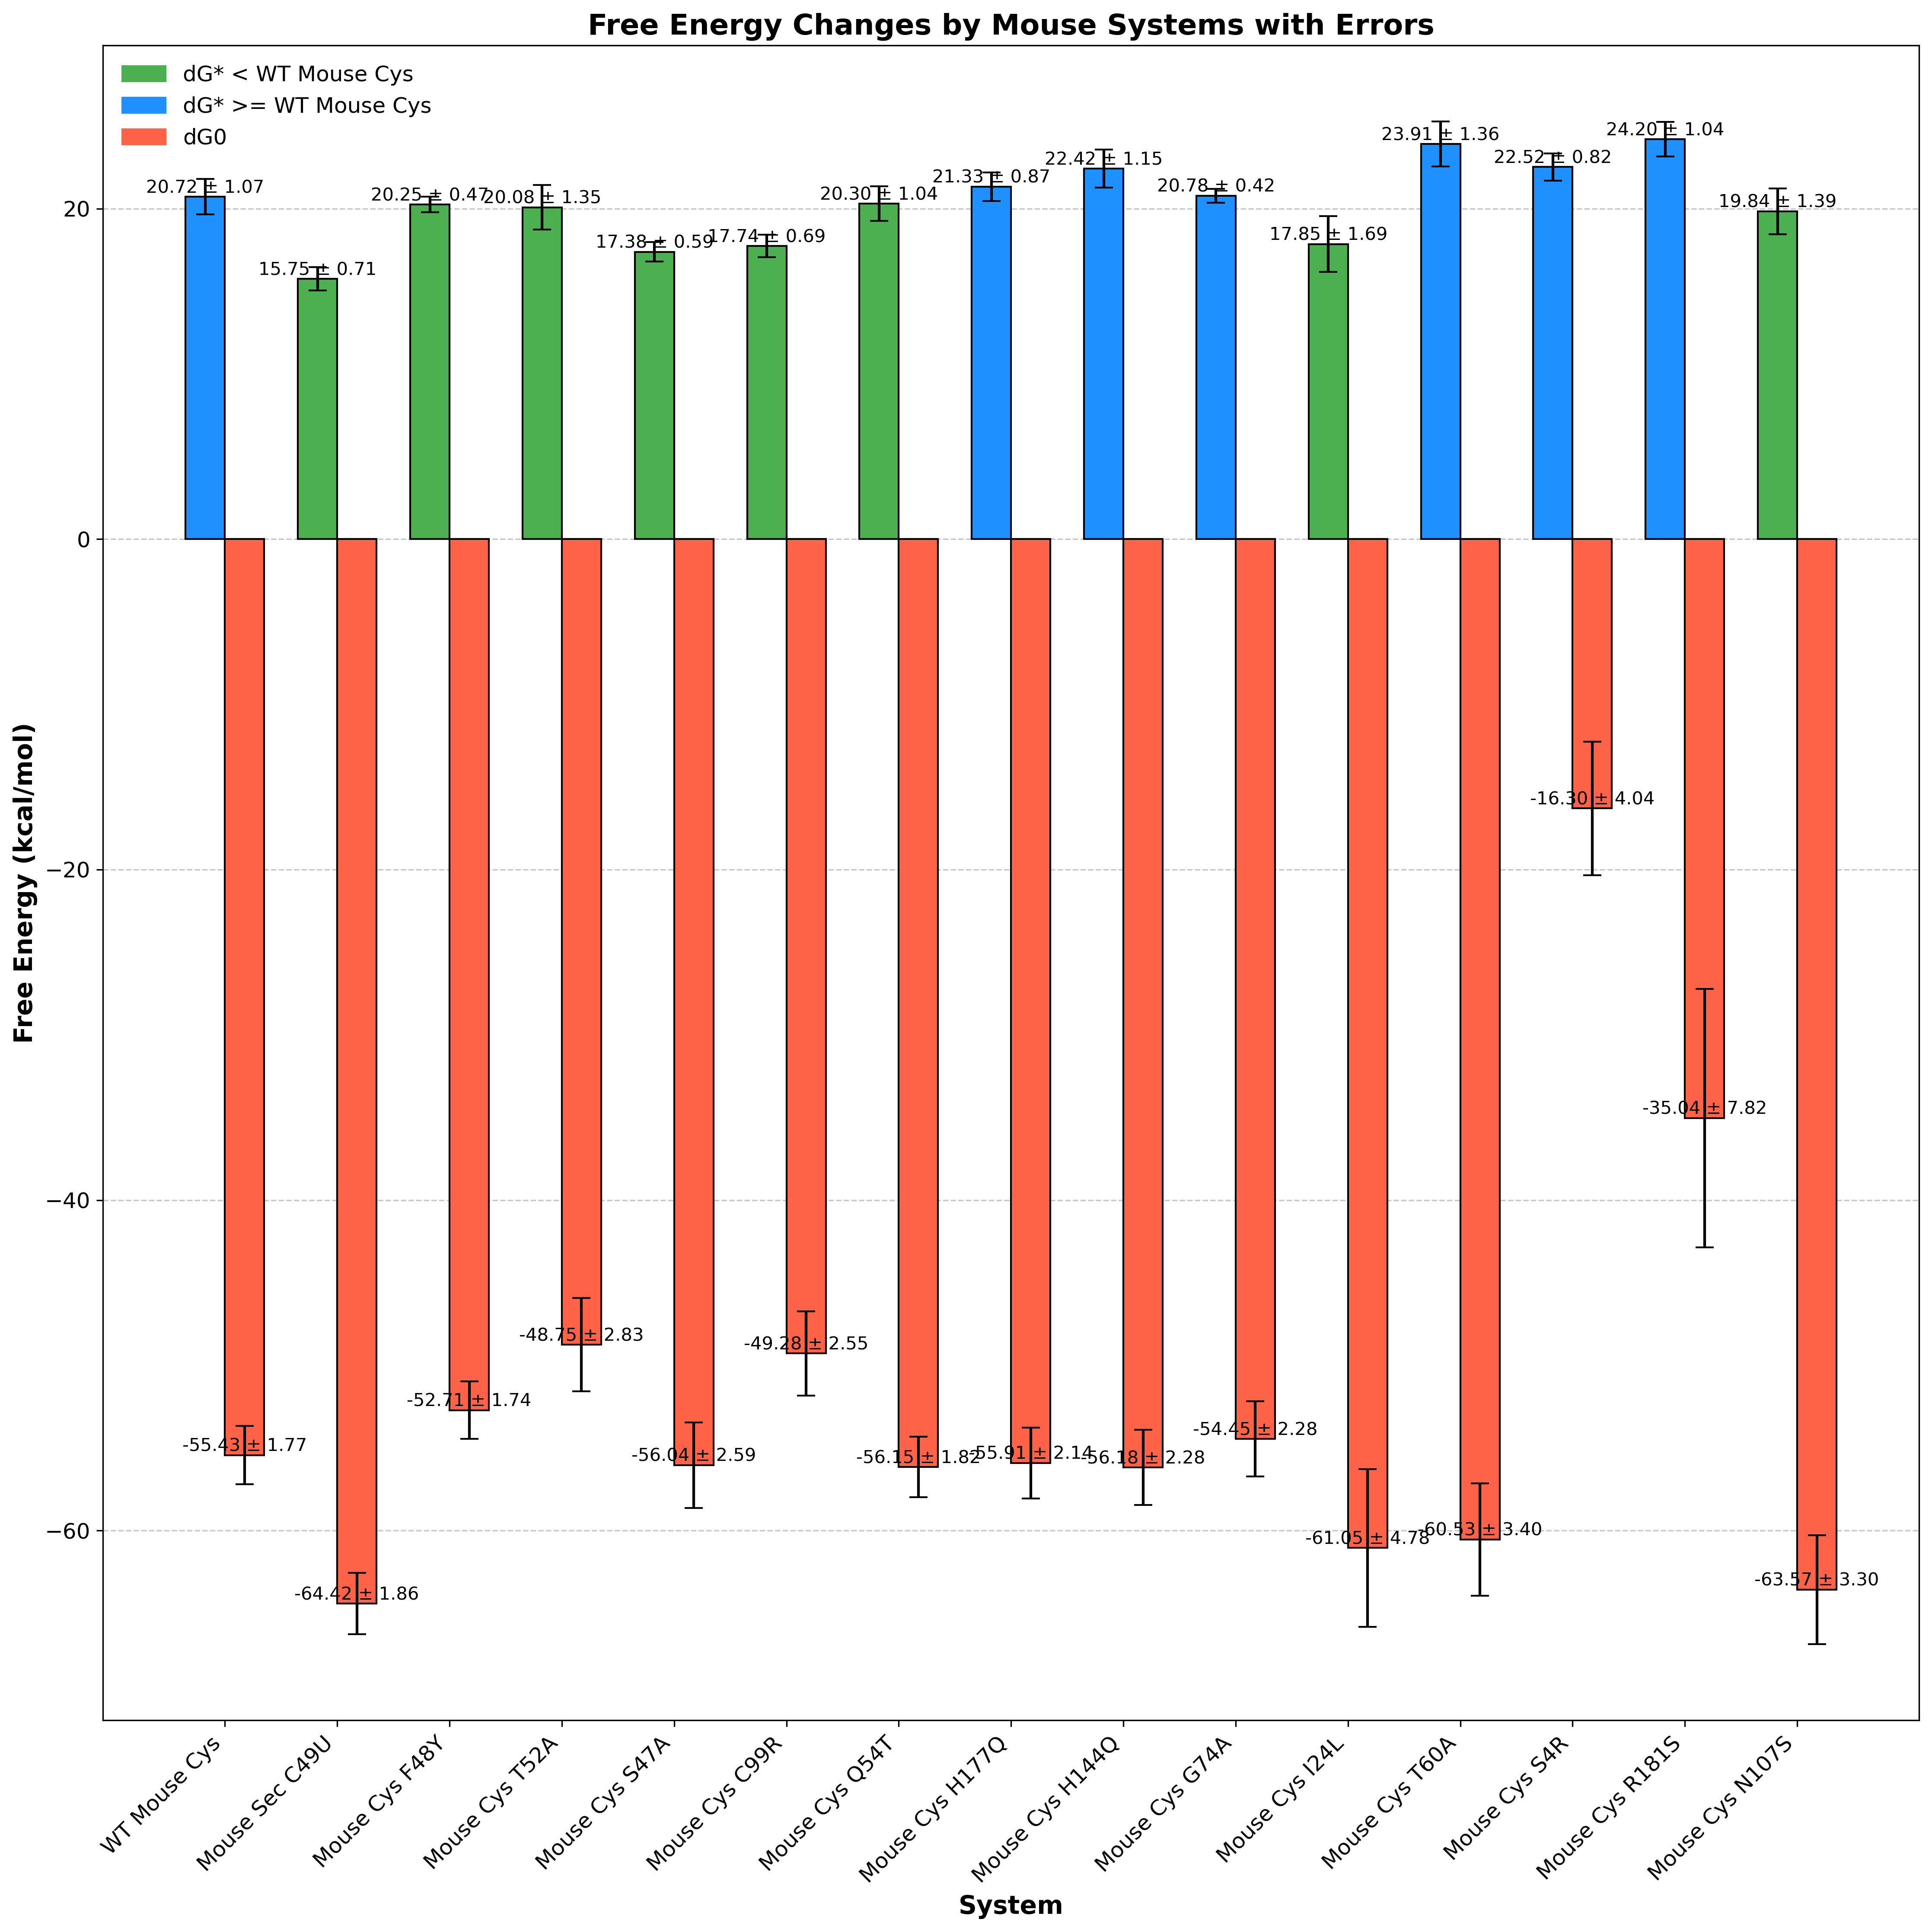

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Barplot_Mousecys.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data for Mouse Cys and Mouse Sec only
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Mouse Cys" in system_name or "Mouse Sec" in system_name:  # Filter for Mouse Cys and Mouse Sec entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Mouse Cys' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Mouse Cys" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Mouse Cys dG* value not found in the table.")

# Threshold for low dG* values (set to WT Mouse Cys dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

# Color scheme: using green for values lower than the threshold and blue for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Blue for normal
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Mouse Systems with Errors', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


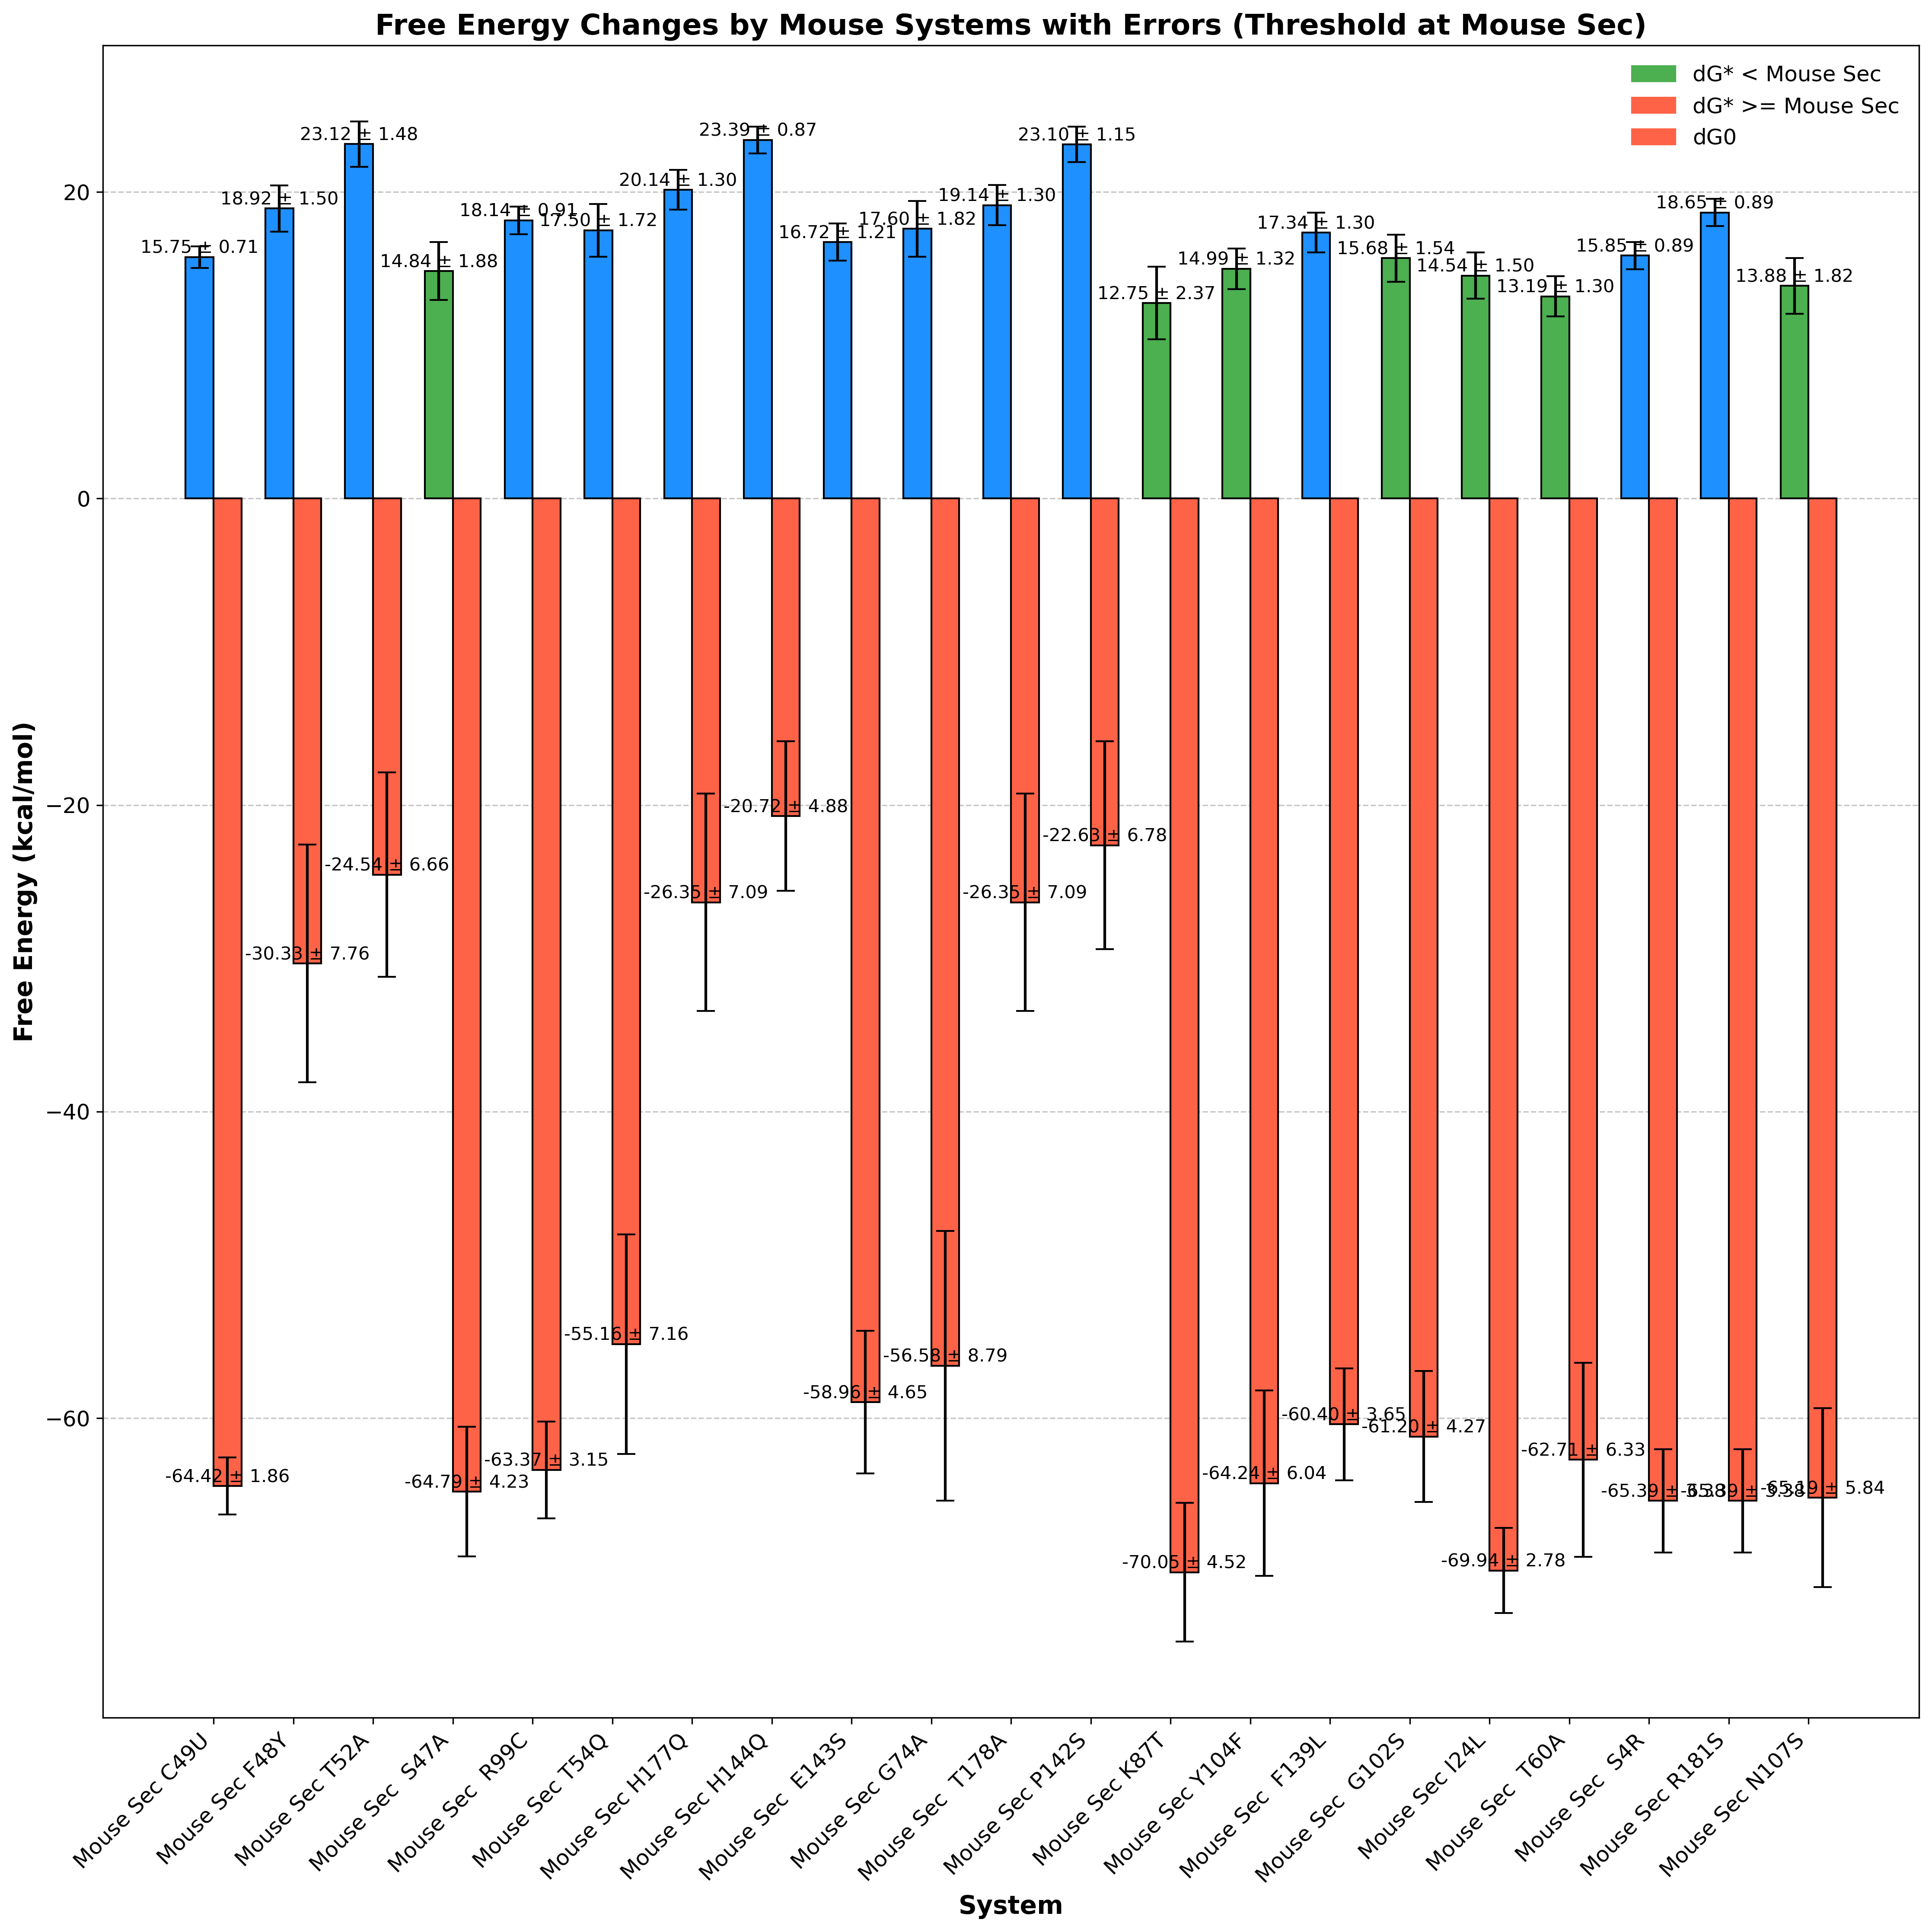

In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy2.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Barplot_Mousesec.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data for Mouse Cys and Mouse Sec only
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Mouse Cys" in system_name or "Mouse Sec" in system_name:  # Filter for Mouse Cys and Mouse Sec entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'Mouse Sec' is found in the list for threshold
mouse_sec_dg_star = None
for i, system in enumerate(systems):
    if "Mouse Sec" in system:
        mouse_sec_dg_star = dg_star_values[i]
        break

if mouse_sec_dg_star is None:
    raise ValueError("Mouse Sec dG* value not found in the table.")

# Threshold for high dG* values (set to Mouse Sec dG* value)
high_dg_star_threshold = mouse_sec_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

# Color scheme: using green for values lower than the threshold and red for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < high_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Red for high
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Mouse Systems with Errors (Threshold at Mouse Sec)', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < Mouse Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG* >= Mouse Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

# Save the plot
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


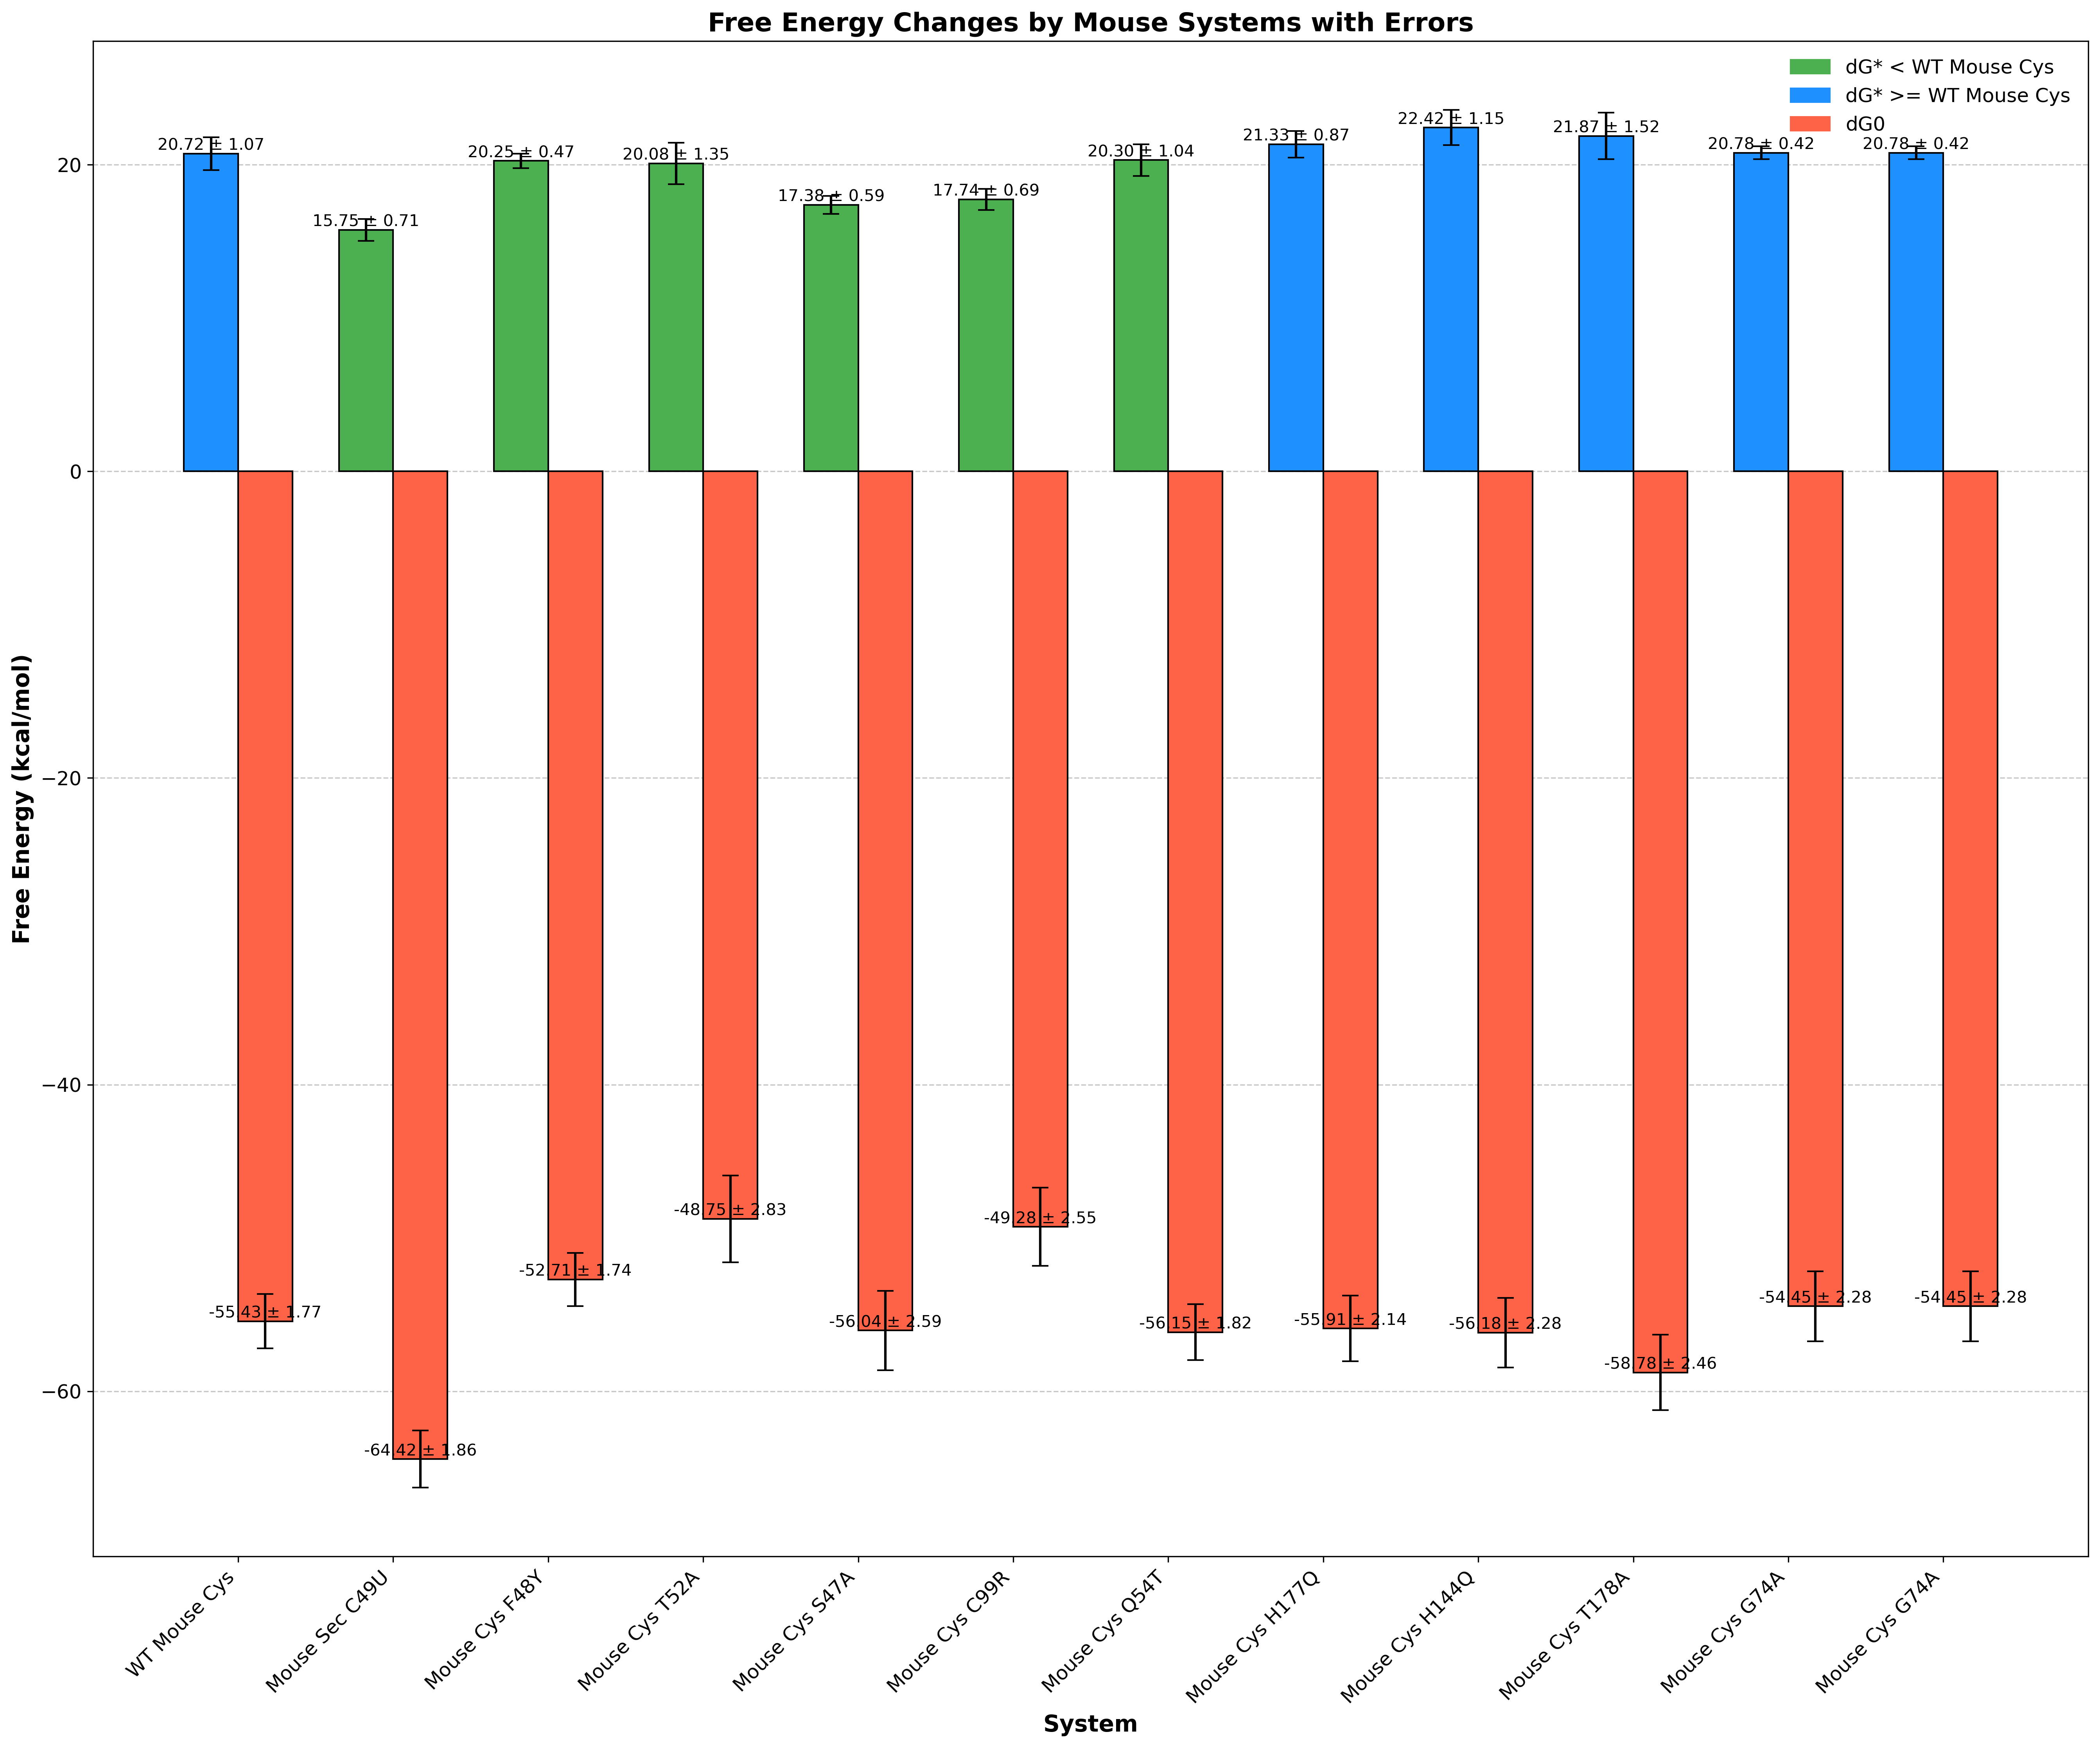

In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Free_Energy_BarPlot_with_Errors_Mouse.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Mouse" in system_name:  # Filter for Mouse entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Mouse Cys' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Mouse Cys" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Mouse Cys dG* value not found in the table.")

# Threshold for low dG* values (set to WT Mouse Cys dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15), dpi=300)  

# Color scheme: using green for values lower than the threshold and blue for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Blue for normal
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Mouse Systems with Errors', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

# Save the figure
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


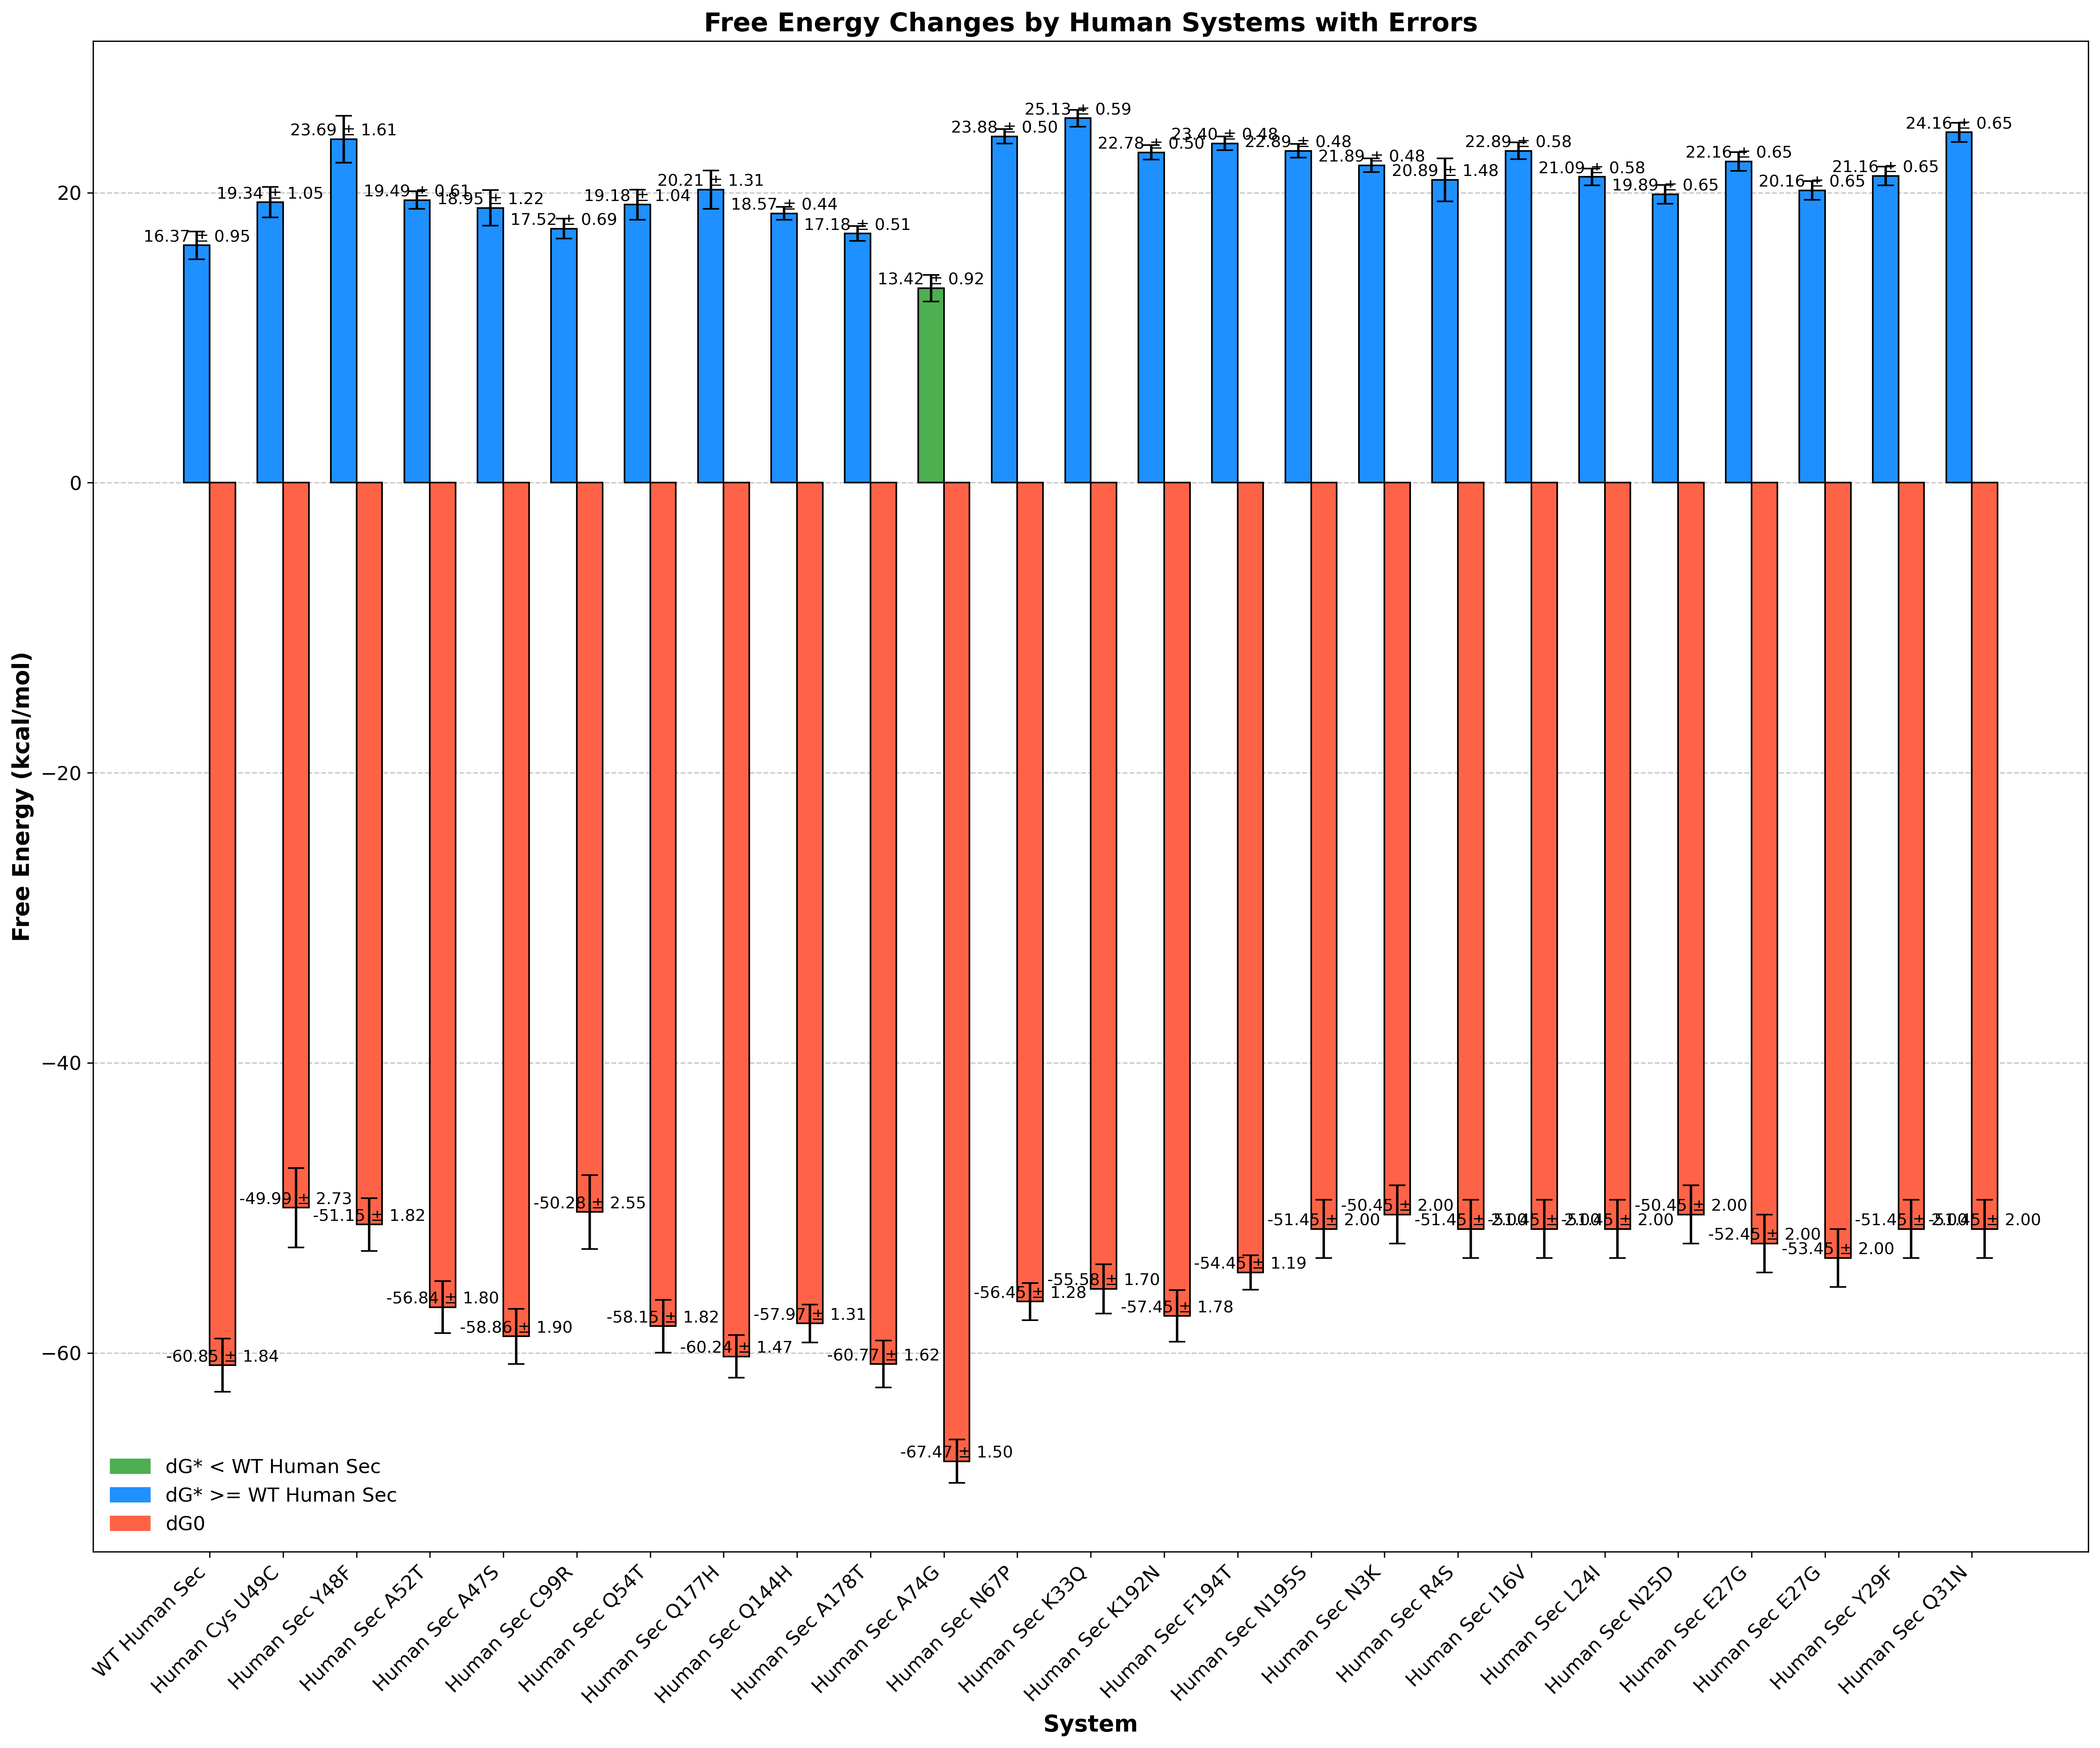

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Free_Energy_BarPlot_with_Errors_Human.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Human" in system_name:  # Filter for Human entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Human Sec' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Human Sec" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Human Sec dG* value not found in the table.")

# Threshold for low dG* values (set to WT-Human Sec dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15), dpi=300)  

# Color scheme: using green for values lower than the threshold and blue for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Blue for normal
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Human Systems with Errors', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Human Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Human Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

# Save the figure
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()
